*    This program regresses IBM excess return on the market excess return
*                 IBM return - r_f  = a + b  (Mkt - r_f)  + e
*                                  to get the alpha and beta 

In [2]:
import pandas as pd                     # To load data, we use the package pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm                      # We use this package to do estimation
%matplotlib inline

# Load the monthly return of IBM, Mkt, Riskfree rate

df = pd.read_excel('IBM.xlsx') 
df2 = pd.read_excel('SP500.xlsx') 
df3 = pd.read_excel('Riskfree.xlsx') 

T = len(df)                     # Get # of obvs (the headers of the Excel doesn't count)

Re = df.loc[:,"Return"]
Mkt = df2.loc[:,"Return"]
Rate = df3.loc[:,"rate"]

print (Mkt[0:2])                                  # check a couple of values
print (Rate[0:2])  

y = Re - Rate/100                                   #  divided by 100 b/c the rate data is in percentage points
x = Mkt - Rate/100

y = np.array (y)                                 # put the string into arrays to set dimension
x = np.array (x)
y.shape = (T,1)                                  # make sure T by 1 vectors
x.shape = (T,1)

const = np.ones((T,1))               # The constant part
xx = np.hstack((const,x))            # Add the constant part to x


# Run the regression

reg = sm.OLS(endog=y, exog=xx)
result = reg.fit()
print(result.summary())


0    0.114701
1   -0.032967
Name: Return, dtype: float64
0    0.05
1    0.02
Name: rate, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     449.3
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.02e-81
Time:                        22:59:24   Log-Likelihood:                 1408.9
No. Observations:                 936   AIC:                            -2814.
Df Residuals:                     934   BIC:                            -2804.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

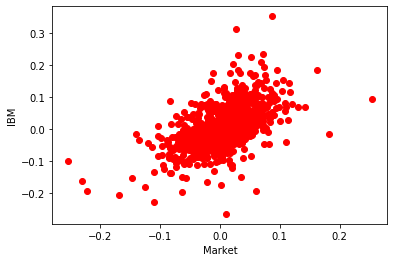

In [3]:
# Plot the excess returns of IBM vs Mkt

p = plt.plot(x, y,'ro')          # plot the raw data
plt.ylabel('IBM')
plt.xlabel('Market')
plt.show()